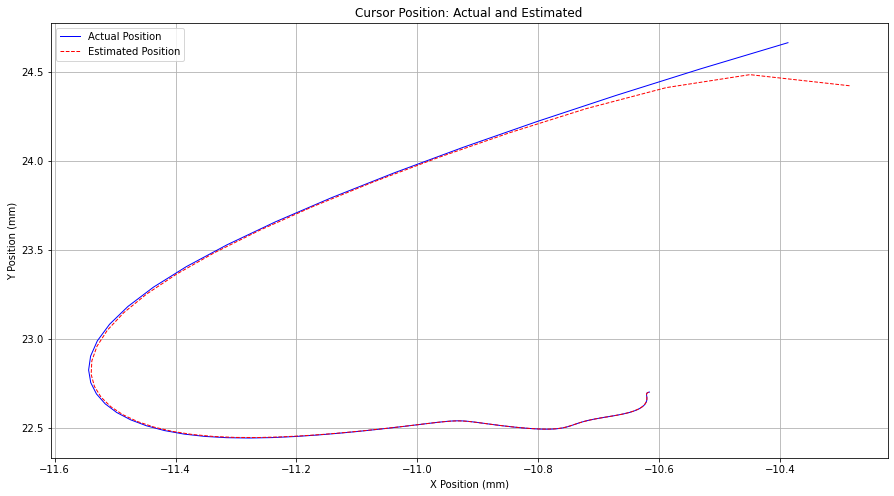

In [67]:
#只考虑位置
import hdf5storage
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
file_path = 'indy_20170131_02.mat'
matfile = hdf5storage.loadmat(file_path)
cursor_pos=matfile['cursor_pos']
A = np.eye(2)
H = np.eye(2)
P_estimate = np.eye(2)
Q = np.eye(2) * 0.01
R = np.eye(2) * 0.01
length=203995
estimated_positions = np.zeros((length,2))
x_estimate = np.zeros(2)
for i in range(cursor_pos.shape[0]):
    # Prediction step
    x_predict = A @ x_estimate
    P_predict = A @ P_estimate @ A.T + Q

    # Update step
    K = P_predict @ H.T @ np.linalg.inv(H @ P_predict @ H.T + R)
    x_estimate = x_predict + K @ (cursor_pos[i, :] - H @ x_predict)
    P_estimate = (np.eye(2) - K @ H) @ P_predict

    estimated_positions[i, :] = x_estimate
plt.figure(figsize=(15, 8))
plt.plot(cursor_pos[:100, 0], cursor_pos[:100, 1], label='Actual Position', color='blue', linewidth=1)
plt.plot(estimated_positions[:100, 0], estimated_positions[:100, 1], label='Estimated Position', color='red', linestyle='--', linewidth=1)
plt.title('Cursor Position: Actual and Estimated')
plt.xlabel('X Position (mm)')
plt.ylabel('Y Position (mm)')
plt.legend()
plt.grid(True)
plt.show()    

只考虑位置的卡尔曼滤波器的MSE: 0.028606111445713255


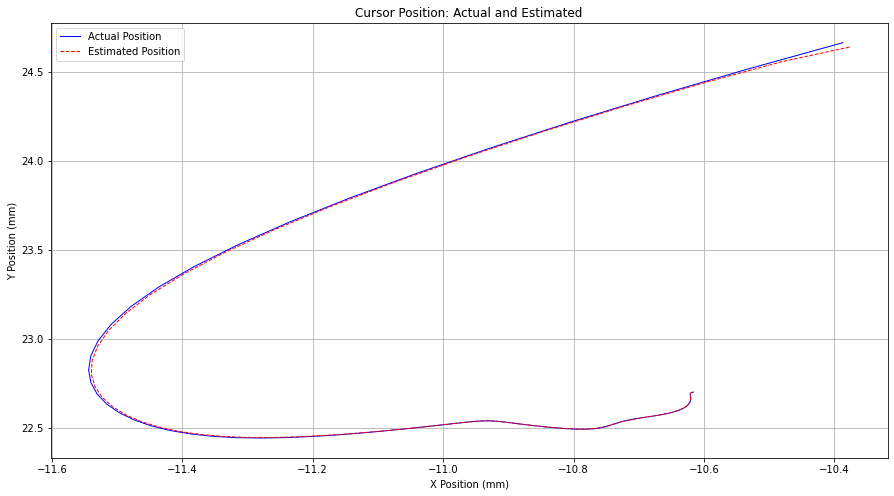

In [73]:
#不同 Q、R、P 初始值对计算结果的影响
matfile = hdf5storage.loadmat(file_path)
cursor_pos=matfile['cursor_pos']
A = np.eye(2)
H = np.eye(2)
P_estimate = np.eye(2)
Q = np.eye(2) * 0.001
R = np.eye(2) * 0.001
length=203995
estimated_positions = np.zeros((length,2))
x_estimate = np.zeros(2)
for i in range(cursor_pos.shape[0]):
    # Prediction step
    x_predict = A @ x_estimate
    P_predict = A @ P_estimate @ A.T + Q

    # Update step
    K = P_predict @ H.T @ np.linalg.inv(H @ P_predict @ H.T + R)
    x_estimate = x_predict + K @ (cursor_pos[i, :] - H @ x_predict)
    P_estimate = (np.eye(2) - K @ H) @ P_predict

    estimated_positions[i, :] = x_estimate
mse_1 = mean_squared_error(cursor_pos, estimated_positions)
print("只考虑位置的卡尔曼滤波器的MSE:", mse_1)
plt.figure(figsize=(15, 8))
plt.plot(cursor_pos[:100, 0], cursor_pos[:100, 1], label='Actual Position', color='blue', linewidth=1)
plt.plot(estimated_positions[:100, 0], estimated_positions[:100, 1], label='Estimated Position', color='red', linestyle='--', linewidth=1)
plt.title('Cursor Position: Actual and Estimated')
plt.xlabel('X Position (mm)')
plt.ylabel('Y Position (mm)')
plt.legend()
plt.grid(True)
plt.show()  


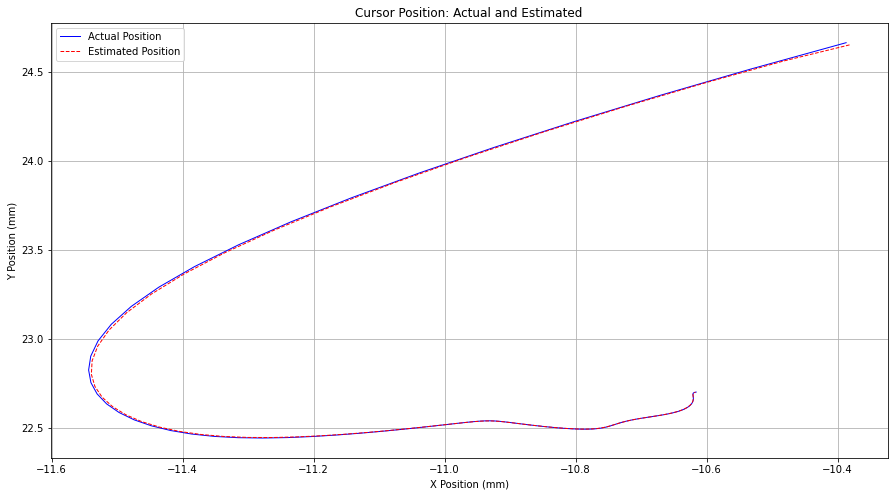

In [71]:
#不同 Q、R、P 初始值对计算结果的影响
matfile = hdf5storage.loadmat(file_path)
cursor_pos=matfile['cursor_pos']
A = np.eye(2)
H = np.eye(2)
P_estimate = np.eye(2)*2
Q = np.eye(2) * 0.001
R = np.eye(2) * 0.001
length=203995
estimated_positions = np.zeros((length,2))
x_estimate = np.zeros(2)
for i in range(cursor_pos.shape[0]):
    # Prediction step
    x_predict = A @ x_estimate
    P_predict = A @ P_estimate @ A.T + Q

    # Update step
    K = P_predict @ H.T @ np.linalg.inv(H @ P_predict @ H.T + R)
    x_estimate = x_predict + K @ (cursor_pos[i, :] - H @ x_predict)
    P_estimate = (np.eye(2) - K @ H) @ P_predict

    estimated_positions[i, :] = x_estimate
plt.figure(figsize=(15, 8))
plt.plot(cursor_pos[:100, 0], cursor_pos[:100, 1], label='Actual Position', color='blue', linewidth=1)
plt.plot(estimated_positions[:100, 0], estimated_positions[:100, 1], label='Estimated Position', color='red', linestyle='--', linewidth=1)
plt.title('Cursor Position: Actual and Estimated')
plt.xlabel('X Position (mm)')
plt.ylabel('Y Position (mm)')
plt.legend()
plt.grid(True)
plt.show()  

只考虑速度的卡尔曼滤波器的MSE: 0.04139151348680083


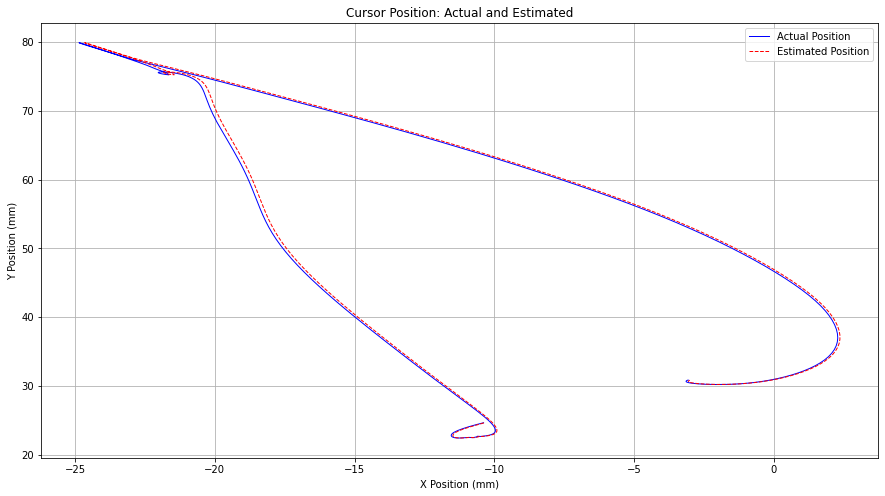

In [72]:
#只考虑速度
matfile = hdf5storage.loadmat(file_path)
cursor_pos=matfile['cursor_pos']
dt=0.004
A = np.array([[1, dt],
              [0, 1]])
H = np.eye(2)
P_estimate = np.eye(2)
Q = np.eye(2) * 0.001
R = np.eye(2) * 0.001
length=203995
estimated_positions = np.zeros((length,2))
x_estimate = np.zeros(2)
for i in range(cursor_pos.shape[0]):
    # Prediction step
    x_predict = A @ x_estimate
    P_predict = A @ P_estimate @ A.T + Q

    # Update step
    K = P_predict @ H.T @ np.linalg.inv(H @ P_predict @ H.T + R)
    x_estimate = x_predict + K @ (cursor_pos[i, :] - H @ x_predict)
    P_estimate = (np.eye(2) - K @ H) @ P_predict

    estimated_positions[i, :] = x_estimate
mse_2 = mean_squared_error(cursor_pos, estimated_positions)
print("只考虑速度的卡尔曼滤波器的MSE:", mse_2)
plt.figure(figsize=(15, 8))
plt.plot(cursor_pos[:500, 0], cursor_pos[:500, 1], label='Actual Position', color='blue', linewidth=1)
plt.plot(estimated_positions[:500, 0], estimated_positions[:500, 1], label='Estimated Position', color='red', linestyle='--', linewidth=1)
plt.title('Cursor Position: Actual and Estimated')
plt.xlabel('X Position (mm)')
plt.ylabel('Y Position (mm)')
plt.legend()
plt.grid(True)
plt.show()

同时考虑位置和速度的卡尔曼滤波器的MSE: 0.025924248416936743


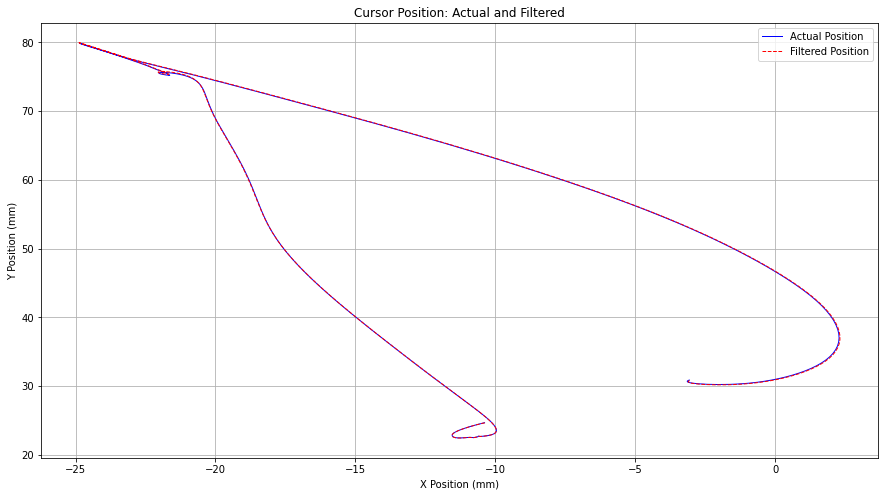

In [75]:
#同时使用位置、速度
matfile = hdf5storage.loadmat(file_path)
cursor_pos=matfile['cursor_pos']
t=matfile['t'].T
dt=0.004
A_1 = np.array([[1, 0, dt, 0],
              [0, 1, 0, dt],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])
H_1 = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])
x_estimate_1 = np.zeros(4)
P_estimate_1 = np.eye(4)
Q_1 = np.eye(4) * 0.001
R_1 = np.eye(2) * 0.001
length=203995
filtered_states = np.zeros(( length,2))
for k in range(0, length):
    # 预测
    x_predict_1 = A_1 @ x_estimate_1 
    P_predict_1 = A_1 @P_estimate_1 @ A_1.T + Q_1
    K_1 = P_predict_1 @ H_1.T @ np.linalg.inv(H_1 @ P_predict_1 @ H_1.T + R_1)
    x_estimate_1 = x_predict_1 + K_1 @ (cursor_pos[k, :] - H_1 @ x_predict_1)
    P_estimate_1 = (np.eye(4) - K_1 @ H_1) @ P_predict_1

    filtered_states[ k,:] = x_estimate_1[:2]
mse_3 = mean_squared_error(cursor_pos,filtered_states)
print("同时考虑位置和速度的卡尔曼滤波器的MSE:", mse_3)
plt.figure(figsize=(15, 8))
plt.plot(cursor_pos[:500, 0], cursor_pos[:500, 1], label='Actual Position', color='blue', linewidth=1)
plt.plot(filtered_states[:500, 0], filtered_states[:500, 1], label='Filtered Position', color='red', linestyle='--', linewidth=1)
plt.title('Cursor Position: Actual and Filtered')
plt.xlabel('X Position (mm)')
plt.ylabel('Y Position (mm)')
plt.legend()
plt.grid(True)
plt.show()

同时考虑位置、速度和加速度的卡尔曼滤波器的MSE: 0.025354902837513127


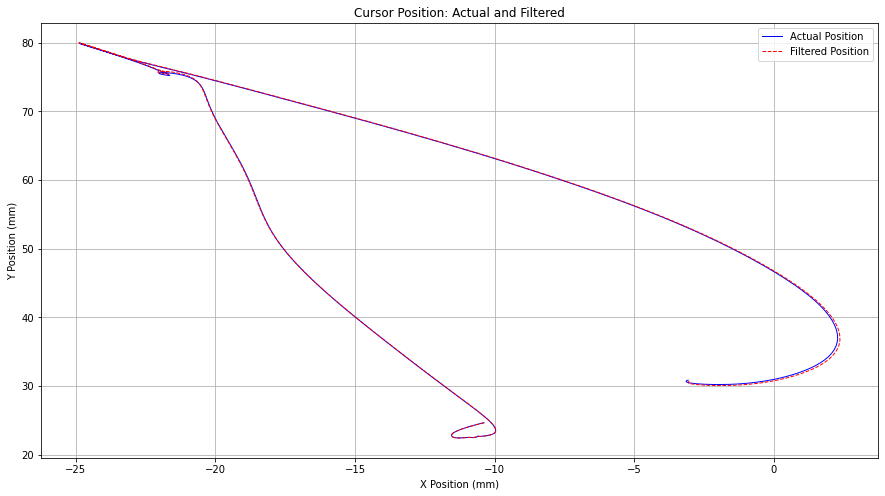

In [76]:
#同时使用位置、速度、加速度
matfile = hdf5storage.loadmat(file_path)
cursor_pos=matfile['cursor_pos']
dt=0.004
A_2 = np.array([
    [1, 0, dt, 0, 0.5 * dt ** 2, 0],
    [0, 1, 0, dt, 0, 0.5 * dt ** 2],
    [0, 0, 1, 0, dt, 0],
    [0, 0, 0, 1, 0, dt],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]])
H_2 = np.array([[1, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0]])
x_estimate_2 = np.zeros(6)
P_estimate_2 = np.eye(6)
Q_2 = np.eye(6) * 0.001
R_2 = np.eye(2) * 0.001
length=203995
filtered_states_2 = np.zeros(( length,2))
for k in range(0, length):
    # 预测
    x_predict_2 = A_2 @ x_estimate_2 
    P_predict_2 = A_2 @P_estimate_2 @ A_2.T + Q_2
    K_2 = P_predict_2 @ H_2.T @ np.linalg.inv(H_2 @ P_predict_2 @ H_2.T + R_2)
    x_estimate_2 = x_predict_2 + K_2 @ (cursor_pos[k, :] - H_2 @ x_predict_2)
    P_estimate_2 = (np.eye(6) - K_2 @ H_2) @ P_predict_2

    filtered_states_2[ k,:] = x_estimate_2[:2]
mse_4 = mean_squared_error(cursor_pos,filtered_states_2)
print("同时考虑位置、速度和加速度的卡尔曼滤波器的MSE:", mse_4)
plt.figure(figsize=(15, 8))
plt.plot(cursor_pos[:500, 0], cursor_pos[:500, 1], label='Actual Position', color='blue', linewidth=1)
plt.plot(filtered_states_2[:500, 0], filtered_states_2[:500, 1], label='Filtered Position', color='red', linestyle='--', linewidth=1)
plt.title('Cursor Position: Actual and Filtered')
plt.xlabel('X Position (mm)')
plt.ylabel('Y Position (mm)')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
#比较不同方法：线性回归
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
cursor_pos=matfile['cursor_pos']
X=cursor_pos[:-1,:]
y=cursor_pos[1:,:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_5 = mean_squared_error(y_test, y_pred)
print("线性回归的MSE:", mse_5)

线性回归的MSE: 0.0754868690268844
